# GDPR Analysis Main Notebook 

**Goal** 
The goal of this notebook is to demonstrate usage of this codebase as well as ultimately assembling the main "dataframe" of this study. 

In [1]:
import pandas as pd
from pathlib import Path
from scipy import stats 
import json
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

> A **note** about the code: The data for this study is partitioned into two sets, _EU_ and _Global_, based on the location of the domain. Most of the analysis is done by sequentially applying a process to each set before moving on, and the code will reflect as much. 

In [2]:
eu_df = pd.read_csv('./eu_dataframe.csv')
g_df = pd.read_csv('./global_dataframe.csv')

In [3]:
eu_dict = {}
for i in eu_df.itertuples():
    eu_dict[i.pid] = {'pid': i.pid, 'pre_ts':i.pre_ts, 'post_ts':i.post_ts}
    continue

In [4]:
g_dict = {}
for i in g_df.itertuples():
    g_dict[i.pid] = {'pid': i.pid, 'pre_ts':i.pre_ts, 'post_ts':i.post_ts}
    continue

## Raw HTML

**EU**

In [5]:
eu_html_dir = Path('./raw_html/EU/')
for path in eu_html_dir.iterdir(): 
    if not path.is_dir(): continue 
    try: 
        pid = int(str(path).split('/')[-1])
        if eu_dict.get(pid) is not None: eu_dict[pid]['raw_html_dir'] = str(path)
    except: 
        continue
    continue 

**Global**

In [6]:
g_html_dir = Path('./raw_html/Global/')
for path in g_html_dir.iterdir(): 
    if not path.is_dir(): continue 
    try: 
        pid = int(str(path).split('/')[-1])
        if g_dict.get(pid) is not None: g_dict[pid]['raw_html_dir'] = str(path)
    except: 
        continue
    continue 

## Text Data

**EU**

In [7]:
eu_text_dir = Path('./text_data/EU/')
for path in eu_text_dir.iterdir(): 
    if not path.is_dir(): continue 
    try: 
        pid = int(str(path).split('/')[-1])
        if eu_dict.get(pid) is not None: eu_dict[pid]['text_dir'] = str(path)
    except: 
        continue
    continue 

**Global**

In [8]:
g_text_dir = Path('./text_data/Global/')
for path in g_text_dir.iterdir(): 
    if not path.is_dir(): continue 
    try: 
        pid = int(str(path).split('/')[-1])
        if g_dict.get(pid) is not None: g_dict[pid]['text_dir'] = str(path)
    except: 
        continue
    continue 

## Polisis Outputs

**EU**

In [9]:
eu_polisis_pre_dir = Path('./polisis_outputs/EU/pre_data/')
for f in eu_polisis_pre_dir.iterdir(): 
    if not str(f).endswith('.json'): continue
    try: 
        pid = int(str(f).split('/')[-1].replace('.json', ''))
        if eu_dict.get(pid) is not None: eu_dict[pid]['pre_polisis_output'] = str(f)
    except:
        continue
    continue

In [10]:
eu_polisis_post_dir = Path('./polisis_outputs/EU/post_data/')
for f in eu_polisis_post_dir.iterdir(): 
    if not str(f).endswith('.json'): continue
    try: 
        pid = int(str(f).split('/')[-1].replace('.json', ''))
        if eu_dict.get(pid) is not None: eu_dict[pid]['post_polisis_output'] = str(f)
    except:
        continue
    continue

**Global**

In [11]:
g_polisis_pre_dir = Path('./polisis_outputs/Global/pre_data/')
for f in g_polisis_pre_dir.iterdir(): 
    if not str(f).endswith('.json'): continue
    try: 
        pid = int(str(f).split('/')[-1].replace('.json', ''))
        if g_dict.get(pid) is not None: g_dict[pid]['pre_polisis_output'] = str(f)
    except:
        continue
    continue

In [12]:
g_polisis_post_dir = Path('./polisis_outputs/Global/post_data/')
for f in g_polisis_post_dir.iterdir(): 
    if not str(f).endswith('.json'): continue
    try: 
        pid = int(str(f).split('/')[-1].replace('.json', ''))
        if g_dict.get(pid) is not None: g_dict[pid]['post_polisis_output'] = str(f)
    except:
        continue
    continue

## Text Feature Analysis

**Methods**

In [71]:
from utils.passive_voice_index import PassiveVoice
import textstat

In [50]:
pv = PassiveVoice()

In [70]:
def calculate_readability_scores(path, pv):
    txt = ''
    with open(path) as fi: 
        txt = fi.read()
    local = {}
    try:
        local['syllables'] = textstat.syllable_count(txt)
    except:
        local['syllables'] = 0
    try:
        local['words'] = textstat.lexicon_count(txt, True)
    except:
        local['words'] = 0
    try:
        local['sentences'] = textstat.sentence_count(txt)
    except:
        local['sentences'] = 0    
    if local.get('words') > 0: 
        local['syllables_per_word'] = local.get('syllables') / local.get('words')
    else: 
        local['syllables_per_word'] = 0
    if local.get('sentences') > 0: 
        local['words_per_sentence'] = local.get('words') / local.get('sentences')
    else: 
        local['words_per_sentence'] = 0
    try: 
        local['passive_voice'] = pv.index(txt)[0]
    except: 
        local['passive_voice'] = 'NA'
    return local

In [ ]:
eu_pre_scores_dict = {}
eu_post_scores_dict = {}
for obj in eu_dict.values():
    try: 
        pre_txt_fname = obj.get('text_dir') + '/%s.txt' % str(obj.get('pre_ts'))
        eu_pre_scores_dict[obj.get('pid')] = calculate_readability_scores(pre_txt_fname, pv)
        post_txt_fname = obj.get('text_dir') + '/%s.txt' % str(obj.get('post_ts'))
        eu_post_scores_dict[obj.get('pid')] = calculate_readability_scores(post_txt_fname, pv)
    except Exception as e: 
        continue
    continue

In [ ]:
g_pre_scores_dict = {}
g_post_scores_dict = {}
for obj in g_dict.values():
    try: 
        pre_txt_fname = obj.get('text_dir') + '/%s.txt' % str(obj.get('pre_ts'))
        g_pre_scores_dict[obj.get('pid')] = calculate_readability_scores(pre_txt_fname, pv)
        post_txt_fname = obj.get('text_dir') + '/%s.txt' % str(obj.get('post_ts'))
        g_post_scores_dict[obj.get('pid')] = calculate_readability_scores(post_txt_fname, pv)
    except Exception as e: 
        print(e)
        continue
    continue

In [99]:
eu_score_datarows = []
for pid in eu_post_scores_dict:
    pre_data = eu_pre_scores_dict.get(pid)
    post_data = eu_post_scores_dict.get(pid)
    local_object = {'pid':pid}
    for i in eu_pre_scores_dict[pid].items(): local_object['pre_' + i[0]] = i[1]
    for i in eu_post_scores_dict[pid].items(): local_object['post_' + i[0]] = i[1]
    eu_score_datarows.append(local_object)
    continue

In [100]:
g_score_datarows = []
for pid in g_post_scores_dict:
    pre_data = g_pre_scores_dict.get(pid)
    post_data = g_post_scores_dict.get(pid)
    local_object = {'pid':pid}
    for i in g_pre_scores_dict[pid].items(): local_object['pre_' + i[0]] = i[1]
    for i in g_post_scores_dict[pid].items(): local_object['post_' + i[0]] = i[1]
    g_score_datarows.append(local_object)
    continue

In [102]:
eu_score_df = pd.DataFrame.from_dict(eu_score_datarows)
g_score_df = pd.DataFrame.from_dict(g_score_datarows)

In [103]:
metrics = [
 'syllables',
 'words',
 'sentences',
 'syllables_per_word',
 'words_per_sentence',
 'passive_voice'
]

**EU Text Features**

In [104]:
eu_agg_df = eu_score_df[['pre_' + metrics[0], 'post_' + metrics[0]]].describe() 
for m in metrics[1:]: 
    new_df = eu_score_df[['pre_' + m, 'post_' + m]].describe() 
    eu_agg_df = pd.concat([eu_agg_df, new_df], sort=False, axis=1)
eu_agg_df

,pre_syllables,post_syllables,pre_words,post_words,pre_sentences,post_sentences,pre_syllables_per_word,post_syllables_per_word,pre_words_per_sentence,post_words_per_sentence,pre_passive_voice,post_passive_voice
count,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000
mean,3534.181582,4670.449092,1936.149805,2621.377108,53.486381,71.359598,1.929158,2.026662,53.226440,50.469536,10.753740,10.904579
std,4580.424208,5291.801500,2010.286743,2564.926608,53.346876,69.624232,1.755271,3.555588,121.101458,144.456981,7.345840,6.887263
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1232.500000,1584.000000,706.000000,889.000000,19.000000,25.000000,1.603804,1.607932,26.944754,27.941289,5.882353,6.666667
50%,2330.000000,3526.000000,1324.000000,1999.000000,38.000000,53.000000,1.657175,1.661128,33.162714,34.735348,10.000000,10.236220
75%,4408.250000,6288.500000,2542.750000,3616.250000,71.000000,95.000000,1.727761,1.726769,43.989247,45.195402,14.625518,14.400000
max,102757.000000,108023.000000,39244.000000,41834.000000,843.000000,1020.000000,67.071217,103.511111,2287.000000,7174.000000,71.428571,71.428571


**Global Text Features**

In [105]:
g_agg_df = g_score_df[['pre_' + metrics[0], 'post_' + metrics[0]]].describe() 
for m in metrics[1:]: 
    new_df = g_score_df[['pre_' + m, 'post_' + m]].describe() 
    g_agg_df = pd.concat([g_agg_df, new_df], sort=False, axis=1)
g_agg_df

,pre_syllables,post_syllables,pre_words,post_words,pre_sentences,post_sentences,pre_syllables_per_word,post_syllables_per_word,pre_words_per_sentence,post_words_per_sentence,pre_passive_voice,post_passive_voice
count,3592.000000,3592.00000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000
mean,2977.430122,4108.18402,1709.454900,2140.436247,48.041203,58.614978,1.794858,1.855023,42.469968,43.758953,11.446691,11.522678
std,2941.519371,6606.60555,1609.232339,2167.402394,42.023663,54.423964,0.697352,1.123994,47.606868,54.506922,7.206845,6.987788
min,11.000000,21.00000,7.000000,11.000000,1.000000,1.000000,1.136466,1.352632,6.750000,8.000000,0.000000,0.000000
25%,1134.000000,1358.50000,646.750000,783.750000,19.000000,22.000000,1.622471,1.624216,26.452434,27.271447,7.135799,7.279347
50%,2158.500000,2687.50000,1240.000000,1566.000000,36.000000,44.000000,1.673433,1.671480,32.714286,33.813657,10.653313,10.544848
75%,3913.250000,5105.25000,2273.500000,2957.500000,67.000000,80.000000,1.739106,1.739150,43.837774,44.365119,14.864865,14.634146
max,66546.000000,122652.00000,19113.000000,54547.000000,411.000000,694.000000,21.565217,30.984582,1099.500000,1534.500000,75.000000,85.714286


**EU Wilcoxon**

In [110]:
eu_wilcoxon = [ {'metric':m, 'statistic':stats.wilcoxon(eu_score_df['pre_' + m], eu_score_df['post_' + m])[0],'p-val':stats.wilcoxon(eu_score_df['pre_' + m], eu_score_df['post_' + m])[1]}  for m in metrics]

In [111]:
eu_wil_df = pd.DataFrame.from_dict(eu_wilcoxon)
print(eu_wil_df)

               metric          p-val  statistic
0           syllables  9.921149e-143   642189.5
1               words  3.049676e-148   593218.0
2           sentences  1.022212e-100   645923.5
3  syllables_per_word   4.650077e-02  1499728.0
4  words_per_sentence   2.838805e-06  1362141.5
5       passive_voice   1.847760e-01  1346780.5


**Global Wilcoxon**

In [112]:
g_wilcoxon = [ {'metric':m, 'statistic':stats.wilcoxon(g_score_df['pre_' + m], g_score_df['post_' + m])[0],'p-val':stats.wilcoxon(g_score_df['pre_' + m], g_score_df['post_' + m])[1]}  for m in metrics]

In [113]:
g_wil_df = pd.DataFrame.from_dict(g_wilcoxon)
print(g_wil_df)

               metric          p-val  statistic
0           syllables  6.360880e-136   617149.0
1               words  6.162516e-141   557550.0
2           sentences   1.517335e-86   627283.5
3  syllables_per_word   9.708243e-01  1490177.0
4  words_per_sentence   4.140274e-04  1318467.5
5       passive_voice   4.291924e-01  1335580.0


## Query Analyses

The query data is organized in the following structure: 
```
/queries
    /coverage > /location.json > pid > source: [strings] 
    /compliance > /location.json > pid > query > source: {count: int}
    /specificity > /location.json > pid > query > source: {S: int, S_a: int}
```

### Coverage Analysis

In [147]:
all_categories = [
    'policy_change', 'first_party_collection_use', 'user_choice_control', 'international_and_specific_audiences',
     'user_access_edit_and_deletion', 'data_retention', 'data_security', 'privacy_contact_information',
     'third_party_sharing_collection']

**EU**

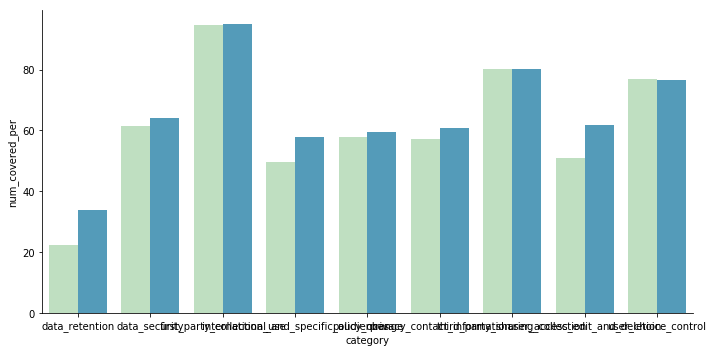

In [152]:
eu_coverage_data = json.load(open('./polisis_queries/coverage/EU.json'))
eu_coverage_by_category = {} # scoreboard
for pid in eu_coverage_data:
    for src in ['archive', 'current']: # a.k.a pre/post
        for category in all_categories: 
            if eu_coverage_by_category.get(category) is None: eu_coverage_by_category[category] = {'archive': {'case':0, 'total':0}, 'current':{'case':0, 'total':0}}
            if category in eu_coverage_data.get(pid).get(src): eu_coverage_by_category[category][src]['case'] += 1
            eu_coverage_by_category[category][src]['total'] += 1

            continue # categories
        continue # src    
    continue # pids 
    
eu_coverage_lod = []
for cat in eu_coverage_by_category:
    pre_case = eu_coverage_by_category.get(cat).get('archive').get('case')
    pre_total = eu_coverage_by_category.get(cat).get('archive').get('total')
    pre_pct = 100*pre_case/pre_total
    
    post_case = eu_coverage_by_category.get(cat).get('current').get('case')
    post_total = eu_coverage_by_category.get(cat).get('current').get('total')
    post_pct = 100*post_case/post_total
    
    eu_coverage_lod.append({'category':cat, 'source':'archive', 'num_covered_per': pre_pct })
    eu_coverage_lod.append({'category':cat, 'source':'current', 'num_covered_per': post_pct})
    continue 

eu_coverage_df = pd.DataFrame.from_dict(eu_coverage_lod)
eu_coverage_df = eu_coverage_df.groupby(['category', 'source'], sort=False).sum().reset_index()
eu_coverage_df.sort_values(['category'], ascending=[True], inplace=True)
eu_coverage_df.sort_values(['source'], ascending=[True], inplace=True)
eu_coverage_df.sort_values(['category'], ascending=[True], inplace=True)
eu_coverage_plot = sns.catplot(x="category", y='num_covered_per', hue="source", data=eu_coverage_df, kind="bar", aspect=80 / 40, orient='v', ci=None, palette=['#bae4bc', '#43a2ca'], legend=False)

**Global**

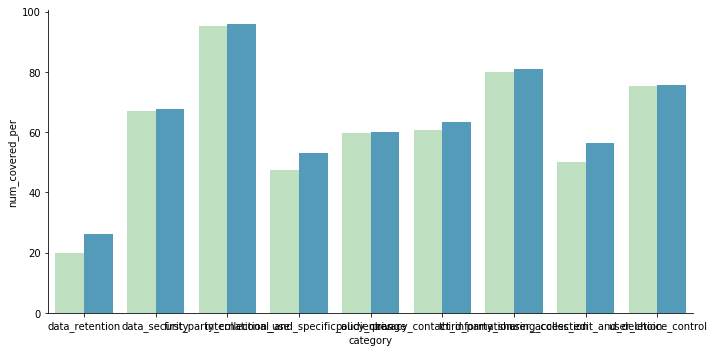

In [153]:
g_coverage_data = json.load(open('./polisis_queries/coverage/Global.json'))
g_coverage_by_category = {} # scoreboard
for pid in g_coverage_data:
    for src in ['archive', 'current']: # a.k.a pre/post
        for category in all_categories: 
            if g_coverage_by_category.get(category) is None: g_coverage_by_category[category] = {'archive': {'case':0, 'total':0}, 'current':{'case':0, 'total':0}}
            if category in g_coverage_data.get(pid).get(src): g_coverage_by_category[category][src]['case'] += 1
            g_coverage_by_category[category][src]['total'] += 1

            continue # categories
        continue # src    
    continue # pids 
    
g_coverage_lod = []
for cat in g_coverage_by_category:
    pre_case = g_coverage_by_category.get(cat).get('archive').get('case')
    pre_total = g_coverage_by_category.get(cat).get('archive').get('total')
    pre_pct = 100*pre_case/pre_total
    
    post_case = g_coverage_by_category.get(cat).get('current').get('case')
    post_total = g_coverage_by_category.get(cat).get('current').get('total')
    post_pct = 100*post_case/post_total
    
    g_coverage_lod.append({'category':cat, 'source':'archive', 'num_covered_per': pre_pct })
    g_coverage_lod.append({'category':cat, 'source':'current', 'num_covered_per': post_pct})
    continue 

g_coverage_df = pd.DataFrame.from_dict(g_coverage_lod)
g_coverage_df = g_coverage_df.groupby(['category', 'source'], sort=False).sum().reset_index()
g_coverage_df.sort_values(['category'], ascending=[True], inplace=True)
g_coverage_df.sort_values(['source'], ascending=[True], inplace=True)
g_coverage_df.sort_values(['category'], ascending=[True], inplace=True)
g_coverage_plot = sns.catplot(x="category", y='num_covered_per', hue="source", data=g_coverage_df, kind="bar", aspect=80 / 40, orient='v', ci=None, palette=['#bae4bc', '#43a2ca'], legend=False)

### Compliance Analysis

**EU**

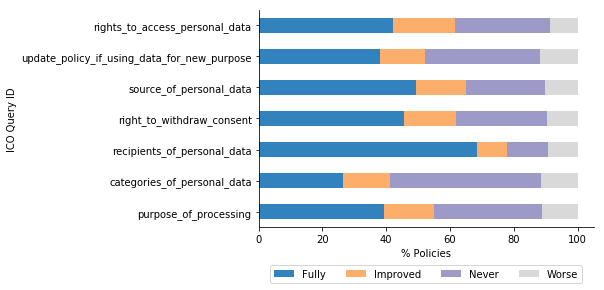

In [30]:
eu_compliance_data = json.load(open('./polisis_queries/compliance/EU.json'))

eu_compliance_by_query = {}
for pid in eu_compliance_data:
    queryset = eu_compliance_data.get(pid).get('queries').get('rights')
    for q in queryset:
        if q == 'retention_period_of_personal_data': continue
        # Init if needed
        if eu_compliance_by_query.get(q) is None: eu_compliance_by_query[q] = {'fully':0, 'improved':0, 'never':0, 'worse':0}
        # Set flags for compliance
        is_pre_comp = queryset.get(q).get('archive').get('count') > 0
        is_post_comp = queryset.get(q).get('current').get('count') > 0 
        
        # Compare pre v. post
        result = (
            'fully' if is_pre_comp and is_post_comp else 
            'improved' if is_post_comp and not is_pre_comp else 
            'worse' if is_pre_comp and not is_post_comp else 
            'never'
        )
        
        # Update
        eu_compliance_by_query[q][result] += 1
        
        
        continue # queries
    continue # pids

eu_compliance_datarows = []
for query in eu_compliance_by_query:
    total = sum([eu_compliance_by_query.get(query).get(result) for result in ['fully', 'improved', 'worse', 'never']])
    eu_compliance_datarows.append({
        'query':query, 
        'fully':eu_compliance_by_query.get(query).get('fully')/total,
        'improved':eu_compliance_by_query.get(query).get('improved')/total,
        'worse':eu_compliance_by_query.get(query).get('worse')/total,
        'never':eu_compliance_by_query.get(query).get('never')/total,
    })
    

eu_compl_df = pd.DataFrame.from_dict(eu_compliance_datarows)
eu_compl_df = eu_compl_df.groupby('query', sort=False).agg(['sum'])
eu_plotter = eu_compl_df.div(eu_compl_df.sum(axis=1), axis=0).multiply(100)

ax = eu_plotter.plot(kind='barh', stacked=True, colormap='tab20c', sort_columns=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('ICO Query ID')
ax.set_xlabel('% Policies')
legend_list = ['Fully','Improved', 'Never', 'Worse']
plt.legend(legend_list, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)

**Global**

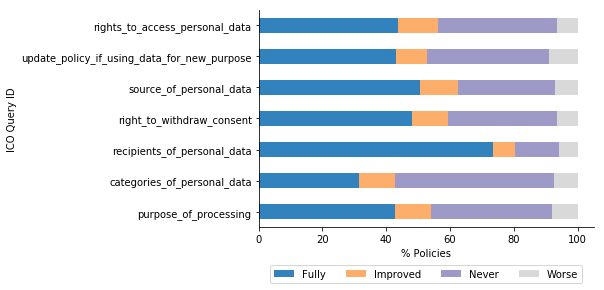

In [29]:
g_compliance_data = json.load(open('./polisis_queries/compliance/Global.json'))

g_compliance_by_query = {}
for pid in g_compliance_data:
    queryset = g_compliance_data.get(pid).get('queries').get('rights')
    for q in queryset:
        if q == 'retention_period_of_personal_data': continue
        # Init if needed
        if g_compliance_by_query.get(q) is None: g_compliance_by_query[q] = {'fully':0, 'improved':0, 'never':0, 'worse':0}
        # Set flags for compliance
        is_pre_comp = queryset.get(q).get('archive').get('count') > 0
        is_post_comp = queryset.get(q).get('current').get('count') > 0 
        
        # Compare pre v. post
        result = (
            'fully' if is_pre_comp and is_post_comp else 
            'improved' if is_post_comp and not is_pre_comp else 
            'worse' if is_pre_comp and not is_post_comp else 
            'never'
        )
        
        # Update
        g_compliance_by_query[q][result] += 1
        
        
        continue # queries
    continue # pids

g_compliance_datarows = []
for query in g_compliance_by_query:
    total = sum([g_compliance_by_query.get(query).get(result) for result in ['fully', 'improved', 'worse', 'never']])
    g_compliance_datarows.append({
        'query':query, 
        'fully':g_compliance_by_query.get(query).get('fully')/total,
        'improved':g_compliance_by_query.get(query).get('improved')/total,
        'worse':g_compliance_by_query.get(query).get('worse')/total,
        'never':g_compliance_by_query.get(query).get('never')/total,
    })
    

g_compl_df = pd.DataFrame.from_dict(g_compliance_datarows)
g_compl_df = g_compl_df.groupby('query', sort=False).agg(['sum'])
g_plotter = g_compl_df.div(g_compl_df.sum(axis=1), axis=0).multiply(100)

ax = g_plotter.plot(kind='barh', stacked=True, colormap='tab20c', sort_columns=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('ICO Query ID')
ax.set_xlabel('% Policies')
legend_list = ['Fully','Improved', 'Never', 'Worse']
plt.legend(legend_list, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)

### Specificity Analysis

**EU**

**Global**